# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [50]:
# Dependencies
import csv
import time
import datetime
import matplotlib.pyplot as plt
import requests
from scipy import stats
import pandas as pd
import numpy as np
from citipy import citipy
from api_keys import weather_api_key


# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)

lat_lngs = zip(lats,lngs)

## Generate Cities List

In [27]:
#city
cities=[]
for lat_lang in lat_lngs:
    city = citipy.nearest_city(lat_lang[0],lat_lang[1]).city_name
    if city not in cities:
        cities.append(city)
    
len(cities)

601

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [28]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

#outputfile
output_file = "output/cities.csv"

#decided not to use the dictionary and creating 9 empty lists and appending to the dict. 
#I read a values from api call into a list and saved it into csv file.
#weather_dict = dict()
row=[]
# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
i=0
headers=['City','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed','Country','Date']
with open(output_file, 'w') as csvfile:
    weather_writer = csv.writer(csvfile)
    weather_writer.writerow(headers)
    for city in cities:
        try:
            response = requests.get(query_url + city).json()
            row.append(response["name"])
            row.append(response['coord']['lat'])
            row.append(response['coord']['lon'])
            row.append(response['main']['temp_max'])
            row.append(response['main']['humidity'])
            row.append(response['clouds']['all'])
            row.append(response['wind']['speed'])
            row.append(response['sys']['country'])
            row.append(response['dt'])
            weather_writer.writerow(row)           
            row.clear()
#I assumed when you city id it wsa id number I found in response
            print(f' Processing weather for {city} and the number {response["id"]}:{i}-{response["name"]}')
            if i%50 == 0:
                time.sleep(40)
            i+=1
        except:
            print('No data for city {city}')  

 Processing weather for bengkulu and the number 1649150:0-Bengkulu
 Processing weather for ushuaia and the number 3833367:1-Ushuaia
 Processing weather for xingtai and the number 1788927:2-Xingtai
 Processing weather for hamilton and the number 4513583:3-Hamilton
 Processing weather for yellowknife and the number 6185377:4-Yellowknife
No data for city {city}
 Processing weather for chuy and the number 3443061:5-Chui
 Processing weather for hobart and the number 2163355:6-Hobart
 Processing weather for chokurdakh and the number 2126123:7-Chokurdakh
 Processing weather for severo-kurilsk and the number 2121385:8-Severo-Kuril'sk
No data for city {city}
 Processing weather for carnarvon and the number 2074865:9-Carnarvon
 Processing weather for bluff and the number 2206939:10-Bluff
 Processing weather for thompson and the number 6165406:11-Thompson
 Processing weather for mar del plata and the number 3430863:12-Mar del Plata
 Processing weather for rikitea and the number 4030556:13-Rikitea

 Processing weather for vanavara and the number 2013727:20-Vanavara
 Processing weather for rionegro and the number 3670730:21-Rionegro
 Processing weather for atuona and the number 4020109:22-Atuona
No data for city {city}
 Processing weather for kahului and the number 5847411:23-Kahului
 Processing weather for dikson and the number 1507390:24-Dikson
 Processing weather for tasiilaq and the number 3424607:25-Tasiilaq
 Processing weather for toora-khem and the number 1489401:26-Toora-Khem
 Processing weather for oranjemund and the number 3354071:27-Oranjemund
 Processing weather for istanbul and the number 745042:28-Istanbul
 Processing weather for olafsvik and the number 3414079:29-Olafsvik
 Processing weather for bathsheba and the number 3374083:30-Bathsheba
 Processing weather for nabire and the number 1634614:31-Nabire
 Processing weather for port elizabeth and the number 964420:32-Port Elizabeth
No data for city {city}
 Processing weather for paceco and the number 2523942:33-Pacec

 Processing weather for faya and the number 110690:38-Faya
No data for city {city}
 Processing weather for dingle and the number 1714733:39-Dingle
 Processing weather for sudak and the number 692315:40-Sudak
 Processing weather for santa quiteria and the number 3389361:41-Santa Quitéria
 Processing weather for nikolskoye and the number 546105:42-Nikolskoye
 Processing weather for port hedland and the number 2063042:43-Port Hedland
 Processing weather for zhuhai and the number 1790437:44-Zhuhai
 Processing weather for sao joao da barra and the number 3448903:45-São João da Barra
 Processing weather for kruisfontein and the number 986717:46-Kruisfontein
 Processing weather for pitkyaranta and the number 509234:47-Pitkyaranta
 Processing weather for tuktoyaktuk and the number 6170031:48-Tuktoyaktuk
 Processing weather for aleksandrovsk-sakhalinskiy and the number 2127282:49-Aleksandrovsk-Sakhalinskiy
 Processing weather for sitka and the number 5557293:1-Sitka
 Processing weather for varz

 Processing weather for santiago del estero and the number 3835869:7-Santiago del Estero
 Processing weather for lezajsk and the number 766332:8-Leżajsk
 Processing weather for menongue and the number 3347353:9-Menongue
 Processing weather for karpogory and the number 552256:10-Karpogory
 Processing weather for guanica and the number 4565090:11-Guánica
No data for city {city}
 Processing weather for sibolga and the number 1213855:12-Sibolga
 Processing weather for virginia beach and the number 4791259:13-Virginia Beach
 Processing weather for gigmoto and the number 1712961:14-Gigmoto
 Processing weather for stornoway and the number 2636790:15-Stornoway
 Processing weather for buin and the number 3897774:16-Buin
 Processing weather for kawalu and the number 1640902:17-Kawalu
 Processing weather for lafia and the number 2332515:18-Lafia
 Processing weather for sahuaripa and the number 3988265:19-Sahuaripa
 Processing weather for gizo and the number 2108857:20-Gizo Government Station
 Pro

 Processing weather for axim and the number 2303611:28-Esim
 Processing weather for kieta and the number 2094027:29-Kieta
 Processing weather for bucerias and the number 4016734:30-Bucerías
 Processing weather for mahajanga and the number 1062663:31-Mahajanga
 Processing weather for saint-louis and the number 2246451:32-Saint-Louis
 Processing weather for port lincoln and the number 2063036:33-Port Lincoln
 Processing weather for dong hoi and the number 1582886:34-Kwang Binh
 Processing weather for krasnaya gora and the number 542788:35-Krasnaya Gora
 Processing weather for tacuati and the number 3436880:36-Tacuatí
 Processing weather for nerchinsk and the number 2019326:37-Nerchinsk
 Processing weather for beni mazar and the number 359212:38-Beni Mazar
 Processing weather for sawang daen din and the number 1606350:39-Sawang Daen Din
 Processing weather for miedzychod and the number 3091983:40-Międzychód
 Processing weather for tuensang and the number 1254133:41-Tuensang
 Processing we

{}


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [29]:
weather_data = pd.read_csv(output_file)
weather_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bengkulu,-3.80,102.27,75.24,85,100,3.20,ID,1603913634
1,Ushuaia,-54.80,-68.30,46.40,61,75,19.46,AR,1603913634
2,Xingtai,37.06,114.49,55.17,39,100,6.15,CN,1603913635
3,Hamilton,39.18,-84.53,55.40,76,90,5.82,US,1603913427
4,Yellowknife,62.46,-114.35,24.80,73,90,8.05,CA,1603913404


In [37]:
cleaned_weather_data = weather_data.dropna(how="any")
cleaned_weather_data.count()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [38]:
cleaned_weather_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,5.560000e+02
mean,20.386187,19.940468,59.315324,71.525180,48.901079,7.947986,1.603914e+09
std,33.002284,89.563460,22.547272,21.784888,40.425475,5.612759,1.635065e+02
min,-54.800000,-175.200000,-14.570000,1.000000,0.000000,0.450000,1.603913e+09
25%,-5.865000,-56.100000,46.400000,62.000000,1.000000,3.557500,1.603914e+09
50%,25.525000,19.545000,64.400000,77.000000,40.000000,6.710000,1.603914e+09
75%,48.440000,102.272500,77.000000,88.000000,90.000000,11.042500,1.603914e+09
max,78.220000,178.420000,99.120000,100.000000,100.000000,32.080000,1.603914e+09


In [41]:
#  Get the indices of cities that have humidity over 100%.
greater_than_100_humidity_idx = cleaned_weather_data.loc[cleaned_weather_data['Humidity'] > 100].index
greater_than_100_humidity_idx

Int64Index([], dtype='int64')

In [43]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = cleaned_weather_data.drop(greater_than_100_humidity_idx)
clean_city_data.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bengkulu,-3.80,102.27,75.24,85,100,3.20,ID,1603913634
1,Ushuaia,-54.80,-68.30,46.40,61,75,19.46,AR,1603913634
2,Xingtai,37.06,114.49,55.17,39,100,6.15,CN,1603913635
3,Hamilton,39.18,-84.53,55.40,76,90,5.82,US,1603913427
4,Yellowknife,62.46,-114.35,24.80,73,90,8.05,CA,1603913404
5,Chui,-33.70,-53.46,67.41,85,73,10.92,UY,1603913635
6,Hobart,-42.88,147.33,50.00,87,75,5.82,AU,1603913505
7,Chokurdakh,70.63,147.92,-4.16,91,50,7.05,RU,1603913635
8,Severo-Kuril'sk,50.68,156.12,41.83,80,82,1.50,RU,1603913635
9,Carnarvon,-24.87,113.63,68.00,94,0,14.99,AU,1603913635


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

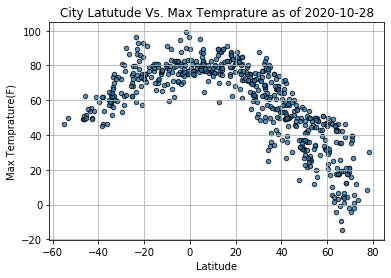

In [65]:
ax = clean_city_data.plot(kind='scatter', x='Lat',y='Max Temp',marker="o", facecolors="red", edgecolors="black",alpha=0.75)
date_of_analysis = datetime.datetime.fromtimestamp(int("1603913634")).strftime('%Y-%m-%d')
ax.set_ylabel('Max Temprature(F)')
ax.set_xlabel('Latitude')
str = 'City Latutude Vs. Max Temprature as of ' + date_of_analysis
ax.set_title(str)
ax.grid()

## Latitude vs. Humidity Plot

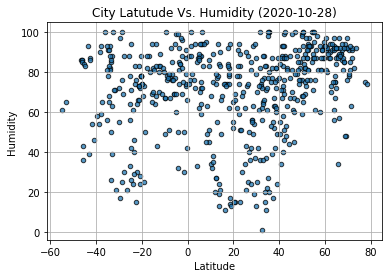

In [66]:
ax = clean_city_data.plot(kind='scatter', x='Lat',y='Humidity',marker="o", facecolors="red", edgecolors="black",alpha=0.75)
ax.set_ylabel('Humidity')
ax.set_xlabel('Latitude')
str = f'City Latutude Vs. Humidity ({date_of_analysis})'
ax.set_title(str)
ax.grid()

## Latitude vs. Cloudiness Plot

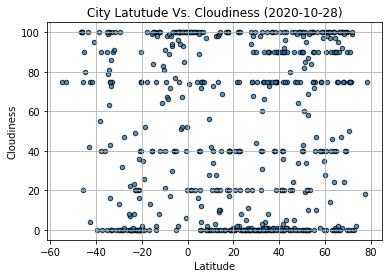

In [67]:
ax = clean_city_data.plot(kind='scatter', x='Lat',y='Cloudiness',marker="o", facecolors="red", edgecolors="black",alpha=0.75)
ax.set_ylabel('Cloudiness')
ax.set_xlabel('Latitude')
str = f'City Latutude Vs. Cloudiness ({date_of_analysis})'
ax.set_title(str)
ax.grid()

## Latitude vs. Wind Speed Plot

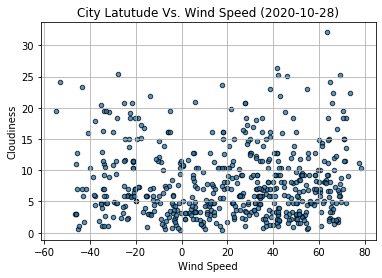

In [68]:
ax = clean_city_data.plot(kind='scatter', x='Lat',y='Wind Speed',marker="o", facecolors="red", edgecolors="black",alpha=0.75)
ax.set_ylabel('Cloudiness')
ax.set_xlabel('Wind Speed')
str = f'City Latutude Vs. Wind Speed ({date_of_analysis})'
ax.set_title(str)
ax.grid()

## Linear Regression

In [69]:
northern_hemi = clean_city_data.loc[clean_city_data.Lat > 0]
northern_hemi

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,Xingtai,37.06,114.49,55.17,39,100,6.15,CN,1603913635
3,Hamilton,39.18,-84.53,55.40,76,90,5.82,US,1603913427
4,Yellowknife,62.46,-114.35,24.80,73,90,8.05,CA,1603913404
7,Chokurdakh,70.63,147.92,-4.16,91,50,7.05,RU,1603913635
8,Severo-Kuril'sk,50.68,156.12,41.83,80,82,1.50,RU,1603913635
...,...,...,...,...,...,...,...,...,...
550,Gujan-Mestras,44.63,-1.07,59.00,77,20,8.05,FR,1603914108
552,Chernyshevskiy,63.01,112.47,4.64,94,46,8.03,RU,1603914123
553,Emba,48.83,58.14,35.60,76,0,0.89,KZ,1603914123
555,Nakusp,50.25,-117.80,37.40,93,100,2.26,CA,1603914123


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Text(0.5, 0, 'Latitude')

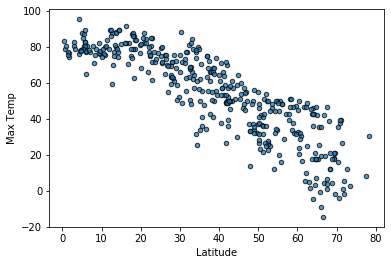

In [70]:
ax = northern_hemi.plot(kind='scatter', x='Lat',y='Max Temp',marker="o", facecolors="red", edgecolors="black",alpha=0.75)
ax.set_ylabel('Max Temp')
ax.set_xlabel('Latitude')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


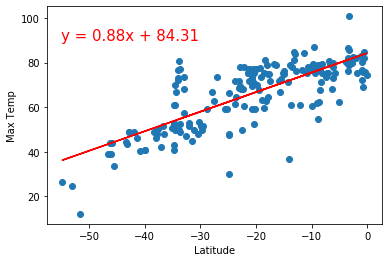

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


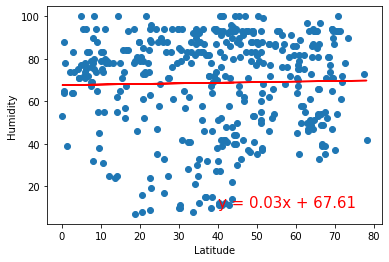

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


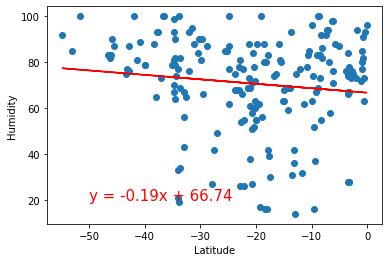

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


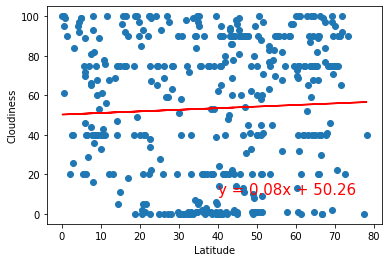

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


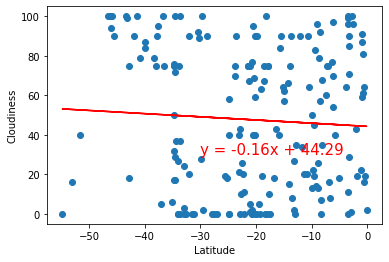

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


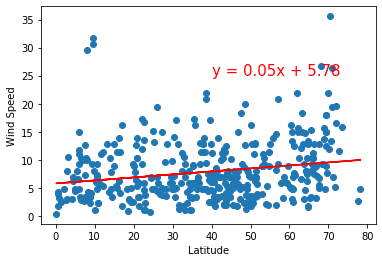

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


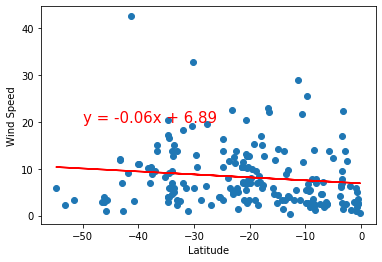